In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/Users/jennifertang/Downloads/govheadline_final.csv')

In [3]:
df['date']=pd.to_datetime(df['date'], dayfirst=True)   #converting ['date'] to datetime

In [4]:
df['month_year'] = df['date'].dt.to_period('M')       #creating new column with only month and year

In [5]:
df['month_year'].unique()

<PeriodArray>
['2021-11', '2021-10', '2021-09', '2021-08', '2021-07', '2021-06', '2021-05',
 '2021-04', '2021-03', '2021-02', '2021-01', '2020-12', '2020-11', '2020-10',
 '2020-09', '2020-08', '2020-07', '2020-06', '2020-05', '2020-04', '2020-03',
 '2020-02', '2020-01', '2019-12', '2019-11', '2019-10', '2019-09', '2019-08',
 '2019-07', '2019-06', '2019-05', '2019-04', '2019-03', '2019-02', '2019-01',
 '2018-12', '2018-11', '2018-10', '2018-09', '2018-08', '2018-07', '2018-06',
 '2018-05', '2018-04', '2018-03', '2018-02', '2018-01', '2017-12', '2017-11',
 '2017-10', '2017-09', '2017-08', '2017-07', '2017-06']
Length: 54, dtype: period[M]

In [6]:
df['month_year']=df['month_year'].map(str)      #['month_year'] is in a type called 'period'
                                                #change it back to string

In [7]:
period = []                               #find out all unique month_year
for i in df['month_year']:
    period.append(i)
period1 = sorted(set(period))

In [8]:
list1 = list(df['title'])

## Finding the frequency of phrases over the years 

In [9]:
#manual input keywords for each category

protest = ["police", "national security law", "rioters", "fugitive"]
covid = ["leavehomesafe", "covid-19", "vaccination", "novel coronarius"]


phrase = [protest, covid]
list6 = []

for d in phrase:

    list4 = []

    for c in d:
        list3 = []
        list2 = []
    
        for a in list1:
            counter = re.findall(rf"\b{c}\b", a, re.IGNORECASE)
            list2.append(counter)

    
        for b in list2:
            list3.append(len(b))
        
        list4.append(list3)   
        
        
    np1 = np.array(list4)
    np2 = np1.sum(axis=0)
    
    list5 = list(np2)
    list6.append(list5)

In [10]:
df1 = pd.DataFrame(list6)

In [11]:
df1.columns = df['month_year']

In [12]:
df2 = df1.T.groupby('month_year').sum()

In [13]:
df2.columns = ['protest', 'covid']         #manual input categories' names as the columns' name

In [14]:
df2[1:-1].head()

,protest,covid
month_year,,
2017-07,11,1
2017-08,6,3
2017-09,3,0
2017-10,2,4
2017-11,5,4


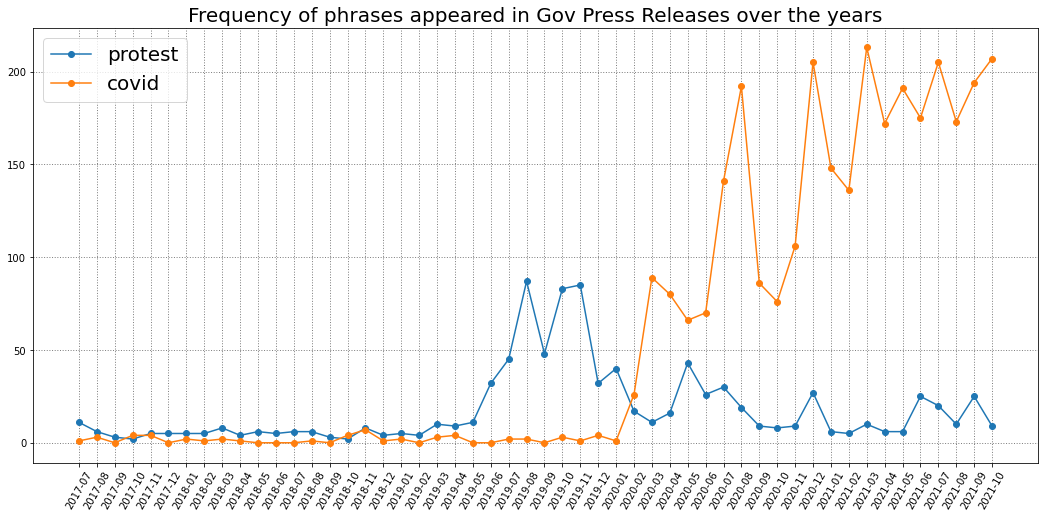

In [15]:
plt.figure(figsize=(18, 8))
plt.title('Frequency of phrases appeared in Gov Press Releases over the years', fontsize=20)
plt.xticks(rotation=60)
plt.plot(df2[1:-1], marker='o')
plt.legend(df2.columns, prop={'size':20})
plt.grid(color='grey', linestyle=':', linewidth=1)
#plt.savefig("/Users/jennifertang/Downloads/frequency_of_phrases.jpg", dpi=720, bbox_inches='tight')
plt.show()

## Finding the frequency of posting over the years

In [16]:
df_posting = df['month_year'].value_counts()

In [17]:
df_posting = df_posting.sort_index()

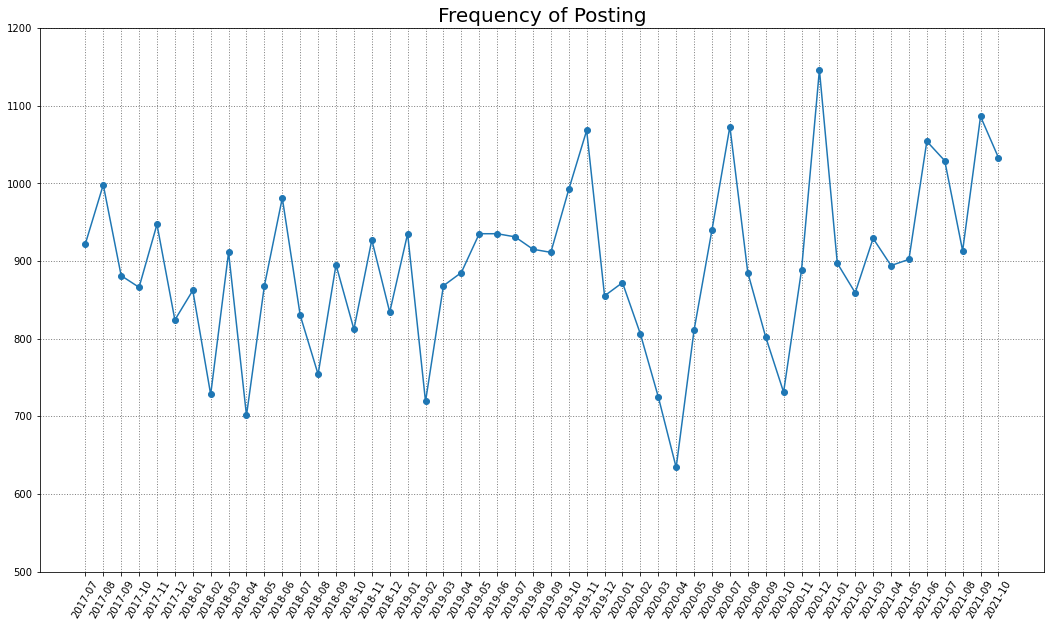

In [18]:
plt.figure(figsize=(18, 10))
plt.title('Frequency of Posting', fontsize=20)
plt.xticks(rotation=60)
plt.ylim(500, 1200)
plt.plot(df_posting[1:-1], marker='o')
plt.grid(color='grey', linestyle=':', linewidth=1)
#plt.savefig("/Users/jennifertang/Downloads/frequency_of_posting.jpg", dpi=720, bbox_inches='tight')
plt.show()